## Testing reputation update and learning 

In [1]:
import study_ordered_large
import seaborn as sns

study_ordered_large.main()

()

In [2]:
import pandas
csv = pandas.read_csv('l-log-2022-04-05.csv', sep=',', header=0)
df_fully_connected = csv[csv['network'] == 'fully-connected']
df_disconnected = csv[csv['network'] == 'disconnected']
df_ring = csv[csv['network'] == 'ring']

In [3]:
# check how many rounds
len(df_fully_connected.loc[df_fully_connected['round'] == 0])

1200

In [5]:
len(df_ring.loc[df_ring['round'] == 0])

160

In [4]:
len(df_disconnected.loc[df_disconnected['round'] == 0])

80

### visualization function

In [9]:
def draw_reputation(network_type, df):
    rep = len(df.loc[df['round'] == 0])
    df['1-2-rep'] = df['player 1 rep'].astype(str) + df['player 2 rep'].astype(str)
    df_r = df[["participant cluster", "round","1-2-rep"]]

    participant_round_counts = df_r.groupby(['1-2-rep','round']).count().reset_index()
    #participant_round_counts.rename(colums={'1-2-choice': 'choice of agent A and B'}, inplace=True)

    pvt = pandas.pivot_table(participant_round_counts, values='participant cluster', index='round',columns=['1-2-rep'])/rep
    sns.lineplot(data=pvt).set(title=network_type+' Reputation record',ylim=(0, 1))

def draw_choices(network_type, df):
    rep = len(df.loc[df['round'] == 0])
    df['1-2-choice'] = df['player 1 choice'].astype(str) + df['player 2 choice'].astype(str)
    df_r = df[["participant cluster", "round","1-2-choice"]]
    participant_round_counts = df_r.groupby(['1-2-choice','round']).count().reset_index()
    #participant_round_counts.rename(colums={'1-2-choice': 'choice of agent A and B'}, inplace=True)

    pvt = pandas.pivot_table(participant_round_counts, values='participant cluster', index='round',columns=['1-2-choice'])/rep
    sns.lineplot(data=pvt).set(title= network_type + ' Average choices',ylim=(0, 1))


In [18]:
import warnings
warnings.filterwarnings('ignore')

## Fully connected

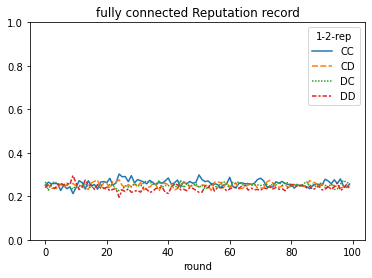

In [19]:
draw_reputation("fully connected", df_fully_connected)

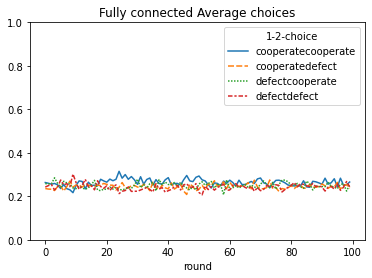

In [20]:
draw_choices("Fully connected", df_fully_connected)

## Ring

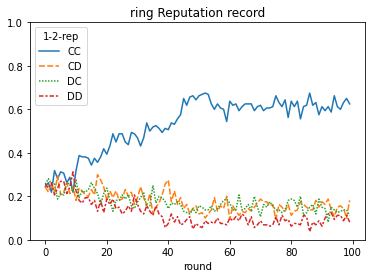

In [21]:
draw_reputation("ring", df_ring)

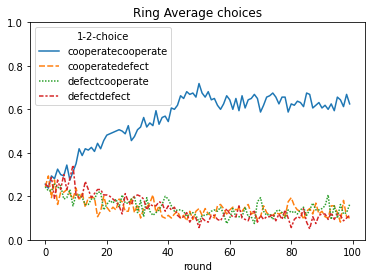

In [22]:
draw_choices("Ring", df_ring)

## Disconnected

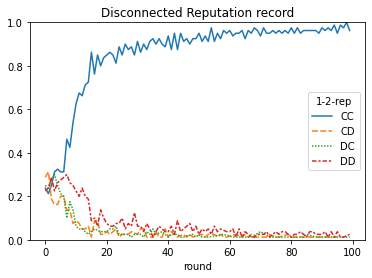

In [23]:
draw_reputation("Disconnected", df_disconnected)

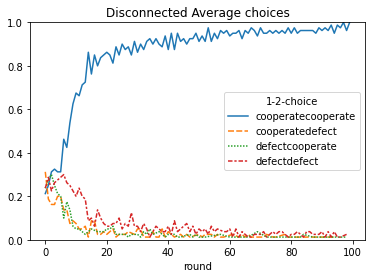

In [24]:
draw_choices("Disconnected", df_disconnected)

## Archive

In [ ]:
rep = len(df_fully_connected.loc[df_fully_connected['round'] == 0])
df_fully_connected['1-2-rep'] = df_fully_connected['player 1 rep'].astype(str) + df_fully_connected['player 2 rep'].astype(str)
df_fully_connected_r = df_fully_connected[["participant cluster", "round","1-2-rep"]]

participant_round_counts = df_fully_connected_r.groupby(['1-2-rep','round']).count().reset_index()
#participant_round_counts.rename(colums={'1-2-choice': 'choice of agent A and B'}, inplace=True)

pvt = pandas.pivot_table(participant_round_counts, values='participant cluster', index='round',columns=['1-2-rep'])/rep
sns.lineplot(data=pvt).set(title='Fully Connected Rep',ylim=(0, 1))

In [ ]:
df_fully_connected['1-2-choice'] = df_fully_connected['player 1 choice'].astype(str) + df_fully_connected['player 2 choice'].astype(str)
df_fully_connected_r = df_fully_connected[["participant cluster", "round","1-2-choice"]]
participant_round_counts = df_fully_connected_r.groupby(['1-2-choice','round']).count().reset_index()
#participant_round_counts.rename(colums={'1-2-choice': 'choice of agent A and B'}, inplace=True)

pvt = pandas.pivot_table(participant_round_counts, values='participant cluster', index='round',columns=['1-2-choice'])/1200
sns.lineplot(data=pvt).set(title='Fully connected',ylim=(0, 1))